## Import Libraries

In [1]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# Naive Bayes Classifier

Algoritma ini didasarkan pada teorema Bayes dan mengasumsikan bahwa setiap variabel independen secara bersyarat. Algoritma ini mudah diimplementasikan, efisien dalam penggunaan memori dan waktu komputasi, serta dapat bekerja dengan baik pada set data yang besar. Namun, algoritma ini tidak cocok untuk data yang memiliki hubungan yang kompleks antara variabelnya.

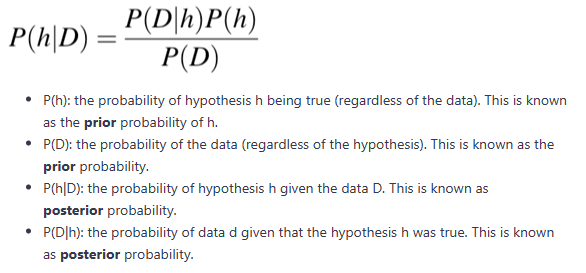

In [2]:
#Feature 1
weather = ['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny','Rainy',
          'Sunny','Overcast','Overcast','Rainy']
# Feature 2
temp = ['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool',
       'Mild','Mild','Mild','Hot','Mild']

# Label atau target
play = ['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

print(len(weather),len(temp),len(play))

14 14 14


### Encode Features

In [3]:
le = LabelEncoder()

w_enc = le.fit_transform(weather)
t_enc = le.fit_transform(temp)
p_enc = le.fit_transform(play)

In [4]:
w_enc

array([2, 2, 0, 1, 1, 1, 0, 2, 2, 1, 2, 0, 0, 1])

In [5]:
t_enc

array([1, 1, 1, 2, 0, 0, 0, 2, 0, 2, 2, 2, 1, 2])

In [6]:
p_enc

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [7]:
features  = list(zip(w_enc,t_enc))
np.array(features).shape

(14, 2)

In [8]:
features

[(2, 1),
 (2, 1),
 (0, 1),
 (1, 2),
 (1, 0),
 (1, 0),
 (0, 0),
 (2, 2),
 (2, 0),
 (1, 2),
 (2, 2),
 (0, 2),
 (0, 1),
 (1, 2)]

### Model Building

In [9]:
from sklearn.naive_bayes import GaussianNB

modelNB = GaussianNB()

### Model Fitting

In [10]:
modelNB.fit(features,p_enc)

modelNB.predict([[0,2]]) # Overcast, Mild

array([1])

In [11]:
modelNB.score(features,p_enc)

0.7142857142857143

## Naive Bayes Multiple Labels

In [12]:
from sklearn.datasets import load_wine

wine = load_wine()

In [13]:
wine.feature_names #nama-nama fitur pada data

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [14]:
# nama-nama label/target pada data
print(wine.target_names)

['class_0' 'class_1' 'class_2']


In [15]:
wine.data.shape

(178, 13)

In [16]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [17]:
# Value Target
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

### Splitting Data

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# 70% train, 30% di test set
X_train, X_test, y_train, y_test = train_test_split(wine.data,wine.target, test_size=0.3 , random_state=2024)

In [20]:
modelNB2 = GaussianNB()
modelNB2.fit(X_train,y_train)

y_pred_test = modelNB2.predict(X_test)

In [21]:
y_pred_test

array([2, 0, 2, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1, 0, 1, 1, 0, 2, 0, 2, 0, 2,
       1, 1, 1, 2, 2, 0, 2, 1, 1, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 1, 1, 1,
       2, 1, 0, 1, 1, 0, 0, 0, 2, 1])

In [22]:
y_test

array([2, 0, 2, 0, 0, 1, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 2, 0, 2, 0, 2,
       1, 1, 1, 2, 2, 0, 2, 1, 1, 0, 0, 2, 0, 2, 2, 1, 0, 0, 2, 1, 1, 1,
       2, 0, 0, 1, 1, 0, 0, 0, 2, 1])

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

In [24]:
y_pred_train = modelNB2.predict(X_train)
y_pred_test = modelNB2.predict(X_test)

In [25]:
print('train set Accuracy',accuracy_score(y_train,y_pred_train))
print('test set Accuracy',accuracy_score(y_test,y_pred_test))

train set Accuracy 0.9919354838709677
test set Accuracy 0.9444444444444444


In [26]:
print('train set \n Classification Report',classification_report(y_train,y_pred_train))
print('test set \n Classification Report', classification_report(y_test,y_pred_test))

train set 
 Classification Report               precision    recall  f1-score   support

           0       1.00      0.98      0.99        41
           1       0.98      1.00      0.99        51
           2       1.00      1.00      1.00        32

    accuracy                           0.99       124
   macro avg       0.99      0.99      0.99       124
weighted avg       0.99      0.99      0.99       124

test set 
 Classification Report               precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.95      0.90      0.92        20
           2       0.89      1.00      0.94        16

    accuracy                           0.94        54
   macro avg       0.95      0.95      0.95        54
weighted avg       0.95      0.94      0.94        54



# Decision Tree

Algoritma pembelajaran mesin yang membangun struktur pohon untuk memprediksi nilai target berdasarkan serangkaian aturan keputusan. Decision Tree mudah dipahami dan diinterpretasikan, tidak memerlukan banyak persiapan data, dan dapat menangani data numerik dan kategorikal. Namun, dapat overfitting dan tidak cocok untuk data yang kompleks.

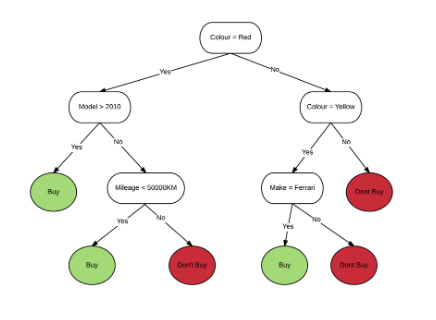

### Build Decision Tree in Sklearn

In [27]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

In [28]:
col_names = ['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']

pima = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/diabetes.csv',header=None,names=col_names)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [29]:
pima.drop(0,inplace=True)

In [30]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [31]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 1 to 768
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pregnant  768 non-null    object
 1   glucose   768 non-null    object
 2   bp        768 non-null    object
 3   skin      768 non-null    object
 4   insulin   768 non-null    object
 5   bmi       768 non-null    object
 6   pedigree  768 non-null    object
 7   age       768 non-null    object
 8   label     768 non-null    object
dtypes: object(9)
memory usage: 54.1+ KB


In [32]:
pima.isna().sum()

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64

In [33]:
for i in pima.columns:
    pima[i] = pima[i].astype(float)

In [34]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 1 to 768
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    float64
 1   glucose   768 non-null    float64
 2   bp        768 non-null    float64
 3   skin      768 non-null    float64
 4   insulin   768 non-null    float64
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    float64
 8   label     768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


In [35]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
2,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
3,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
4,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
5,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [36]:
feature_cols = ['pregnant','insulin','bmi','age','glucose','bp','pedigree']

X = pima[feature_cols]
y = pima['label']

In [37]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=2024)

In [38]:
# Build Model

dtc = DecisionTreeClassifier()

dtc.fit(X_train,y_train)

y_pred_train = dtc.predict(X_train)
y_pred_test = dtc.predict(X_test)

In [39]:
print('train set \n', classification_report(y_train,y_pred_train))
print('test set \n', classification_report(y_test,y_pred_test))

train set 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       350
         1.0       1.00      1.00      1.00       187

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537

test set 
               precision    recall  f1-score   support

         0.0       0.76      0.80      0.78       150
         1.0       0.59      0.53      0.56        81

    accuracy                           0.71       231
   macro avg       0.67      0.67      0.67       231
weighted avg       0.70      0.71      0.70       231



Model diatas overfitting

Overfitting terjadi saat model pembelajaran mesin terlalu rumit dan cocok secara eksklusif dengan data training, sehingga tidak dapat menghasilkan prediksi yang akurat pada data yang belum pernah dilihat sebelumnya. Cara untuk mengatasi overfitting adalah dengan mengurangi kompleksitas model, menggunakan teknik validasi silang, mengumpulkan lebih banyak data training, atau mengurangi fitur yang tidak relevan.

### Visualisasikan Decision Tree

In [40]:
import sklearn.tree as tree
import pydotplus
from six import StringIO
from IPython.display import Image

In [41]:
!pip install six

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


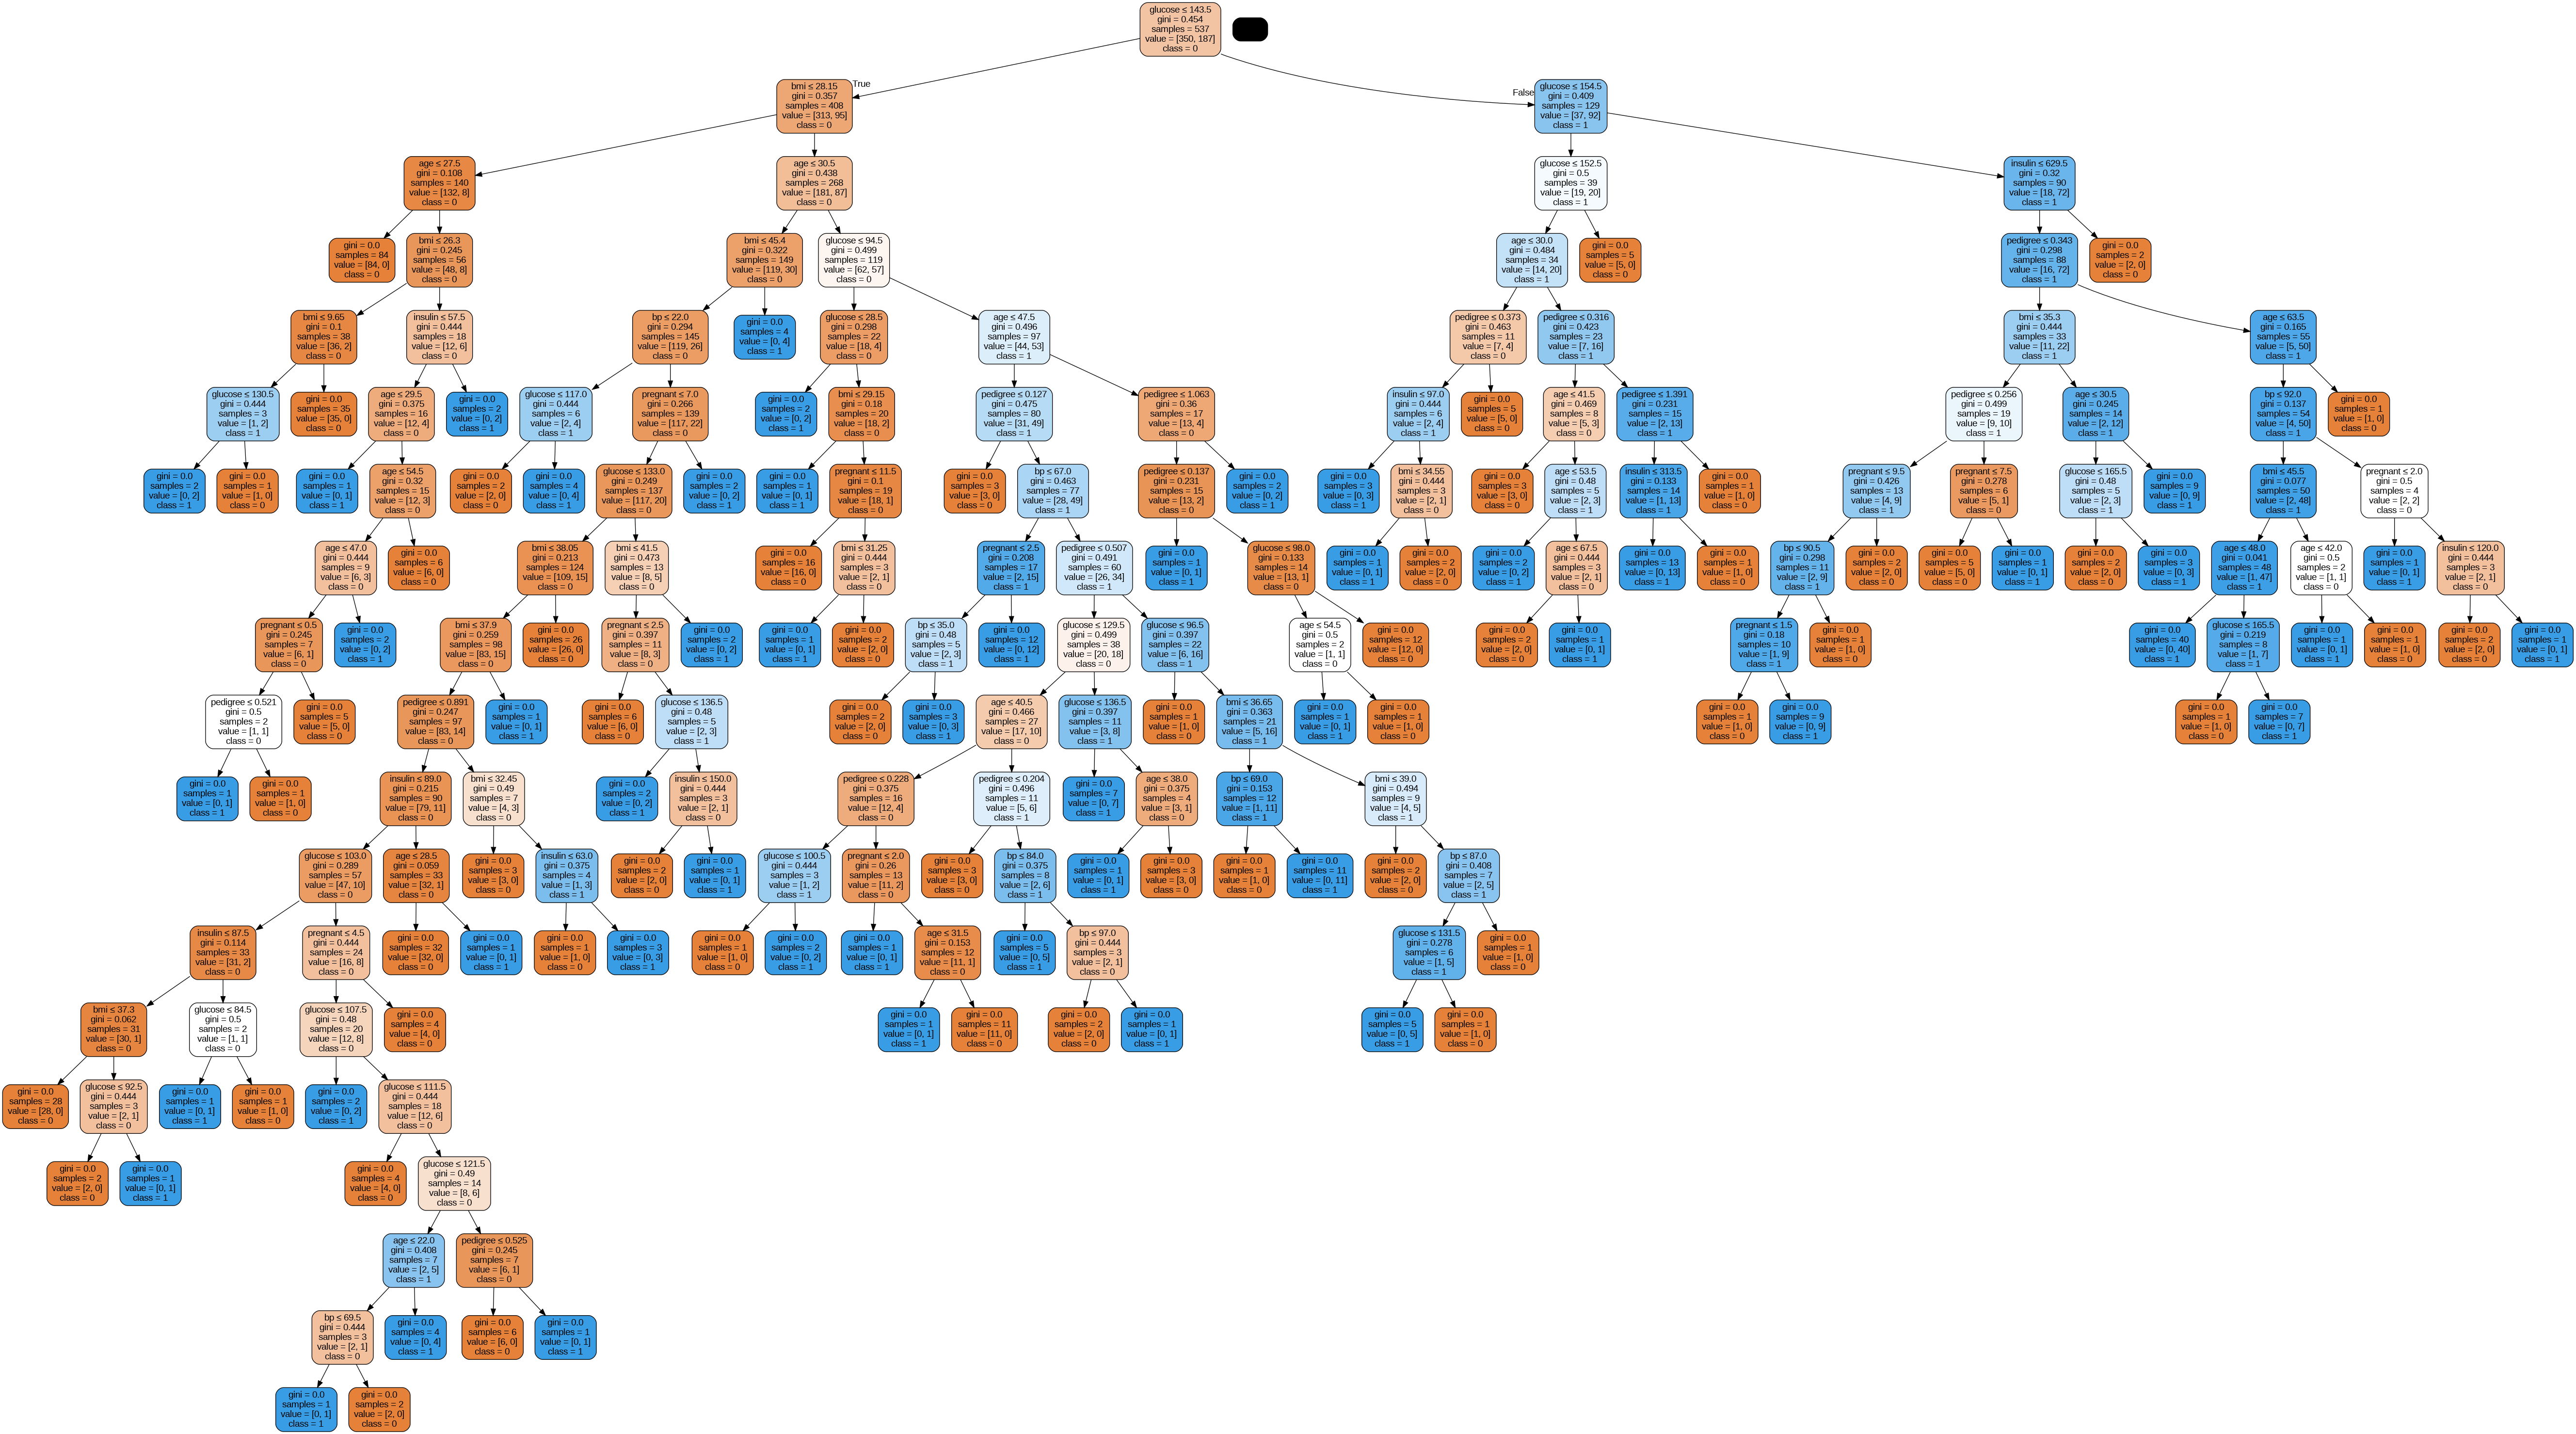

In [42]:
dot_data = StringIO()

tree.export_graphviz(dtc, out_file=dot_data,
                     class_names=['0','1'], # nama target
                     feature_names=feature_cols,
                     filled=True,
                     rounded=True,
                     special_characters=True)
graph  = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

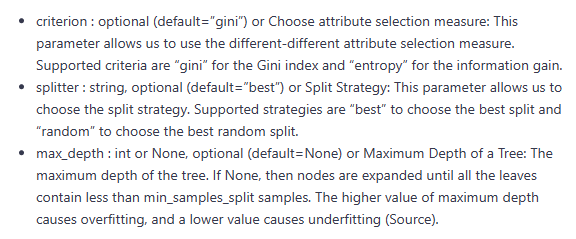

### Ganti max_depth jadi 3

In [43]:
dtc2 = DecisionTreeClassifier(max_depth=3) #prepruning
dtc2.fit(X_train,y_train)

y_pred_train  = dtc2.predict(X_train)
y_pred_test = dtc2.predict(X_test)

In [44]:
print('train \n', classification_report(y_train,y_pred_train))
print('test \n',classification_report(y_test,y_pred_test))

train 
               precision    recall  f1-score   support

         0.0       0.77      0.91      0.84       350
         1.0       0.75      0.49      0.60       187

    accuracy                           0.77       537
   macro avg       0.76      0.70      0.72       537
weighted avg       0.77      0.77      0.75       537

test 
               precision    recall  f1-score   support

         0.0       0.74      0.93      0.82       150
         1.0       0.74      0.40      0.52        81

    accuracy                           0.74       231
   macro avg       0.74      0.66      0.67       231
weighted avg       0.74      0.74      0.72       231



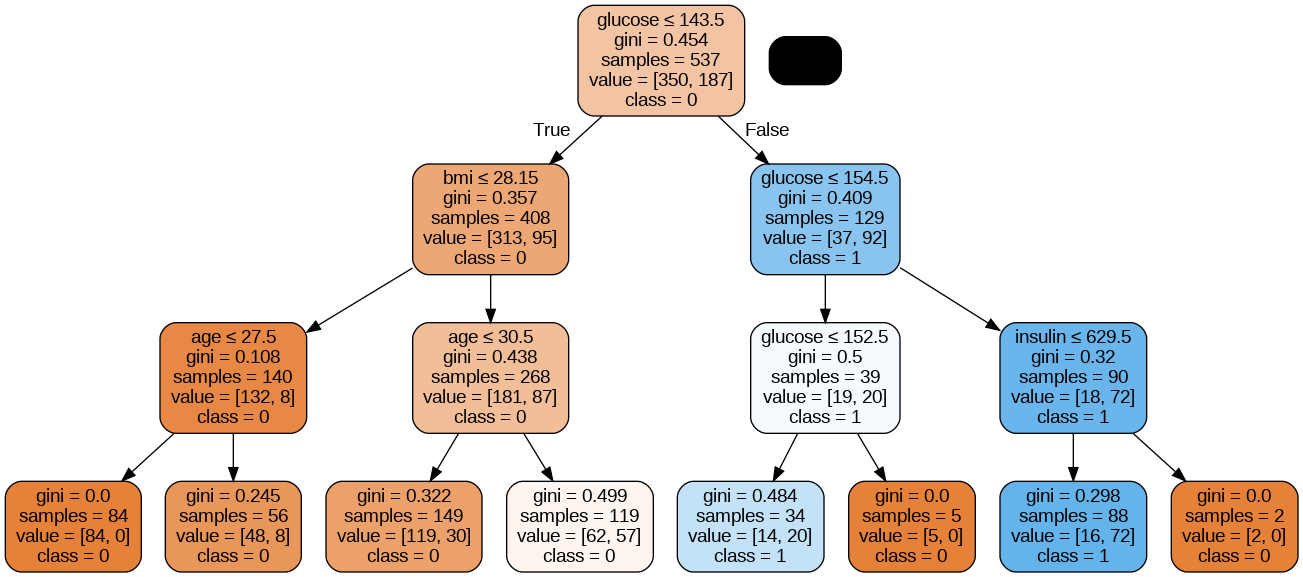

In [45]:
dot_data = StringIO()

tree.export_graphviz(dtc2, out_file=dot_data,
                     class_names=['0','1'], # nama target
                     feature_names=feature_cols,
                     filled=True,
                     rounded=True,
                     special_characters=True)
graph  = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

# Random Forest


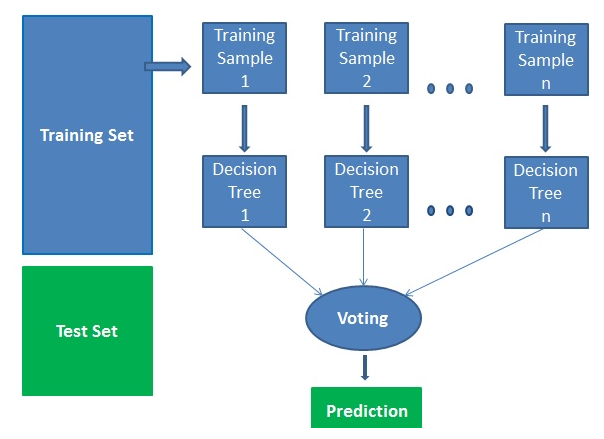

### Build Random Forest Classifier dalam ScikitLearn

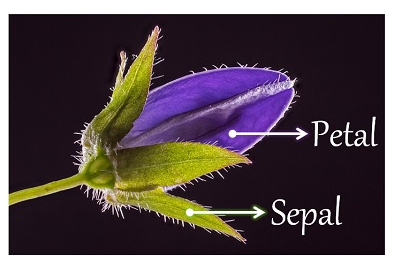

In [46]:
from sklearn.datasets import load_iris

iris = load_iris()

In [47]:
iris.feature_names #namanama fitur/variabel independen

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [48]:
iris.target_names #nama-nama label

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [49]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [50]:
df_iris = pd.DataFrame(iris.data,columns = iris.feature_names)

In [51]:
df_iris['species'] = iris.target
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [52]:
X = df_iris.drop('species',axis=1)
y = df_iris['species']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2024)


In [53]:
from sklearn.ensemble import RandomForestClassifier

rfc  = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train,y_train)

y_pred_train = rfc.predict(X_train)
y_pred_test  = rfc.predict(X_test)

In [54]:
print('train set \n',classification_report(y_train,y_pred_train))
print('test set \n', classification_report(y_test,y_pred_test))

train set 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        38
           2       1.00      1.00      1.00        35

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105

test set 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.85      0.92      0.88        12
           2       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.92      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



- sepal length = 3
- sepal width = 5
- petal length = 4
- petal wodth = 2

In [55]:
rfc.predict([[3,5,4,2]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

### Feature Importance

In [56]:
f_i = rfc.feature_importances_

In [57]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [58]:
feature_imp = pd.Series(f_i,index=iris.feature_names)

In [59]:
feature_imp = feature_imp.sort_values(ascending=False)
feature_imp

petal length (cm)    0.439350
petal width (cm)     0.429573
sepal length (cm)    0.111770
sepal width (cm)     0.019307
dtype: float64

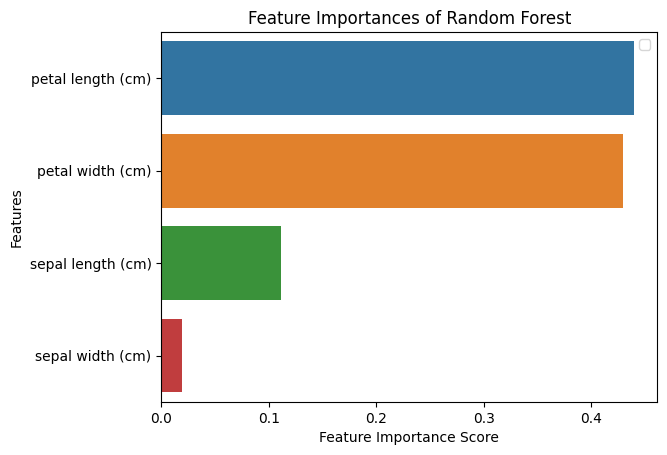

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x = feature_imp, y=feature_imp.index)

plt.title('Feature Importances of Random Forest')
plt.ylabel('Features')
plt.xlabel('Feature Importance Score')
plt.legend()
plt.show()

In [61]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [62]:
X = df_iris.drop(['sepal width (cm)','species'],axis=1)
y = df_iris['species']

X_train,X_test,y_train,y_test =   train_test_split(X,y,test_size=0.3,random_state=2024)

In [63]:
rfc2 = RandomForestClassifier(n_estimators=2)
rfc2.fit(X_train,y_train)

y_pred_train_2 = rfc2.predict(X_train)
y_pred_test_2 = rfc2.predict(X_test)

In [64]:
print('train 2 \n',classification_report(y_train,y_pred_train_2))
print('test 2 \n', classification_report(y_test,y_pred_test_2))

train 2 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.97      1.00      0.99        38
           2       1.00      0.97      0.99        35

    accuracy                           0.99       105
   macro avg       0.99      0.99      0.99       105
weighted avg       0.99      0.99      0.99       105

test 2 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.63      1.00      0.77        12
           2       1.00      0.53      0.70        15

    accuracy                           0.84        45
   macro avg       0.88      0.84      0.82        45
weighted avg       0.90      0.84      0.84        45



In [65]:
print('train set \n',classification_report(y_train,y_pred_train))
print('test set \n', classification_report(y_test,y_pred_test))

train set 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        38
           2       1.00      1.00      1.00        35

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105

test set 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.85      0.92      0.88        12
           2       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.92      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



Kedua model masih overfitting , berarti harus ada hyperparameter tuning (n_estimators, max_depth, dll)

# Support vector Machine

Support Vector Machine (SVM) adalah algoritma pembelajaran mesin yang digunakan untuk memprediksi kelas pada data numerik atau kategorikal. Algoritma ini membangun sebuah hyperplane untuk memisahkan data dari kelas yang berbeda dengan margin maksimal. SVM dapat digunakan untuk tugas-tugas seperti klasifikasi biner dan multikelas, regresi, dan deteksi anomali.

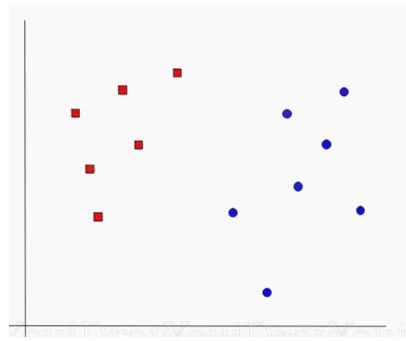

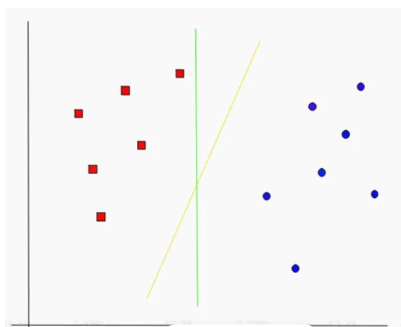

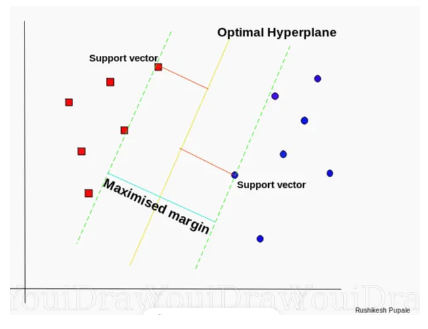

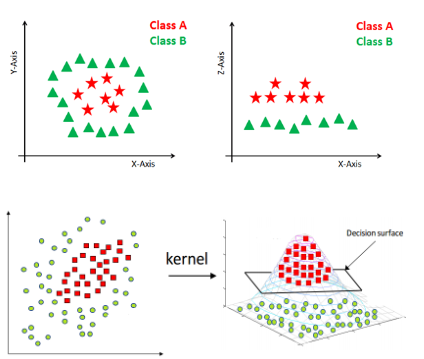

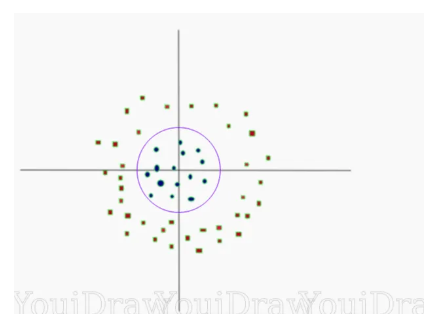

## Build Model with SKlearn

In [66]:
from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer()

In [67]:
df_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [68]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [69]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

0 = malignant , 1 = benign

In [70]:
df_cancer['label'] = cancer.target

In [71]:
X = df_cancer.drop('label',axis=1)
y = df_cancer['label']

In [72]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2024)

## Generate Model

In [73]:
from sklearn.svm import SVC

In [74]:
svc_model = SVC(kernel='linear')

svc_model.fit(X_train,y_train)

y_pred_train  = svc_model.predict(X_train)
y_pred_test= svc_model.predict(X_test)

In [75]:
print('train \n',classification_report(y_train,y_pred_train))

train 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       145
           1       0.98      0.99      0.98       253

    accuracy                           0.98       398
   macro avg       0.98      0.97      0.98       398
weighted avg       0.98      0.98      0.98       398



In [76]:
print('test \n',classification_report(y_test,y_pred_test))

test 
               precision    recall  f1-score   support

           0       0.93      0.94      0.93        67
           1       0.96      0.95      0.96       104

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



## Model Comparison

In [77]:
train = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Final_Dataset/train.csv')
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [78]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [79]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [80]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [81]:
train.describe(include=['O'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [82]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [83]:
train.Gender.fillna(train.Gender.mode()[0],inplace=True)
train.Married.fillna(train.Married.mode()[0],inplace=True)
train.Dependents.fillna(train.Dependents.mode()[0],inplace=True)
train.Self_Employed.fillna(train.Self_Employed.mode()[0],inplace=True)

In [84]:
train.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [85]:
train.LoanAmount.fillna(train.LoanAmount.mean(),inplace=True)

In [86]:
train.Loan_Amount_Term.fillna(train.Loan_Amount_Term.mean(),inplace=True)
train.Credit_History.fillna(train.Credit_History.mean(),inplace=True)

In [87]:
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

array([[<Axes: title={'center': 'ApplicantIncome'}>,
        <Axes: title={'center': 'CoapplicantIncome'}>],
       [<Axes: title={'center': 'LoanAmount'}>,
        <Axes: title={'center': 'Loan_Amount_Term'}>],
       [<Axes: title={'center': 'Credit_History'}>, <Axes: >]],
      dtype=object)

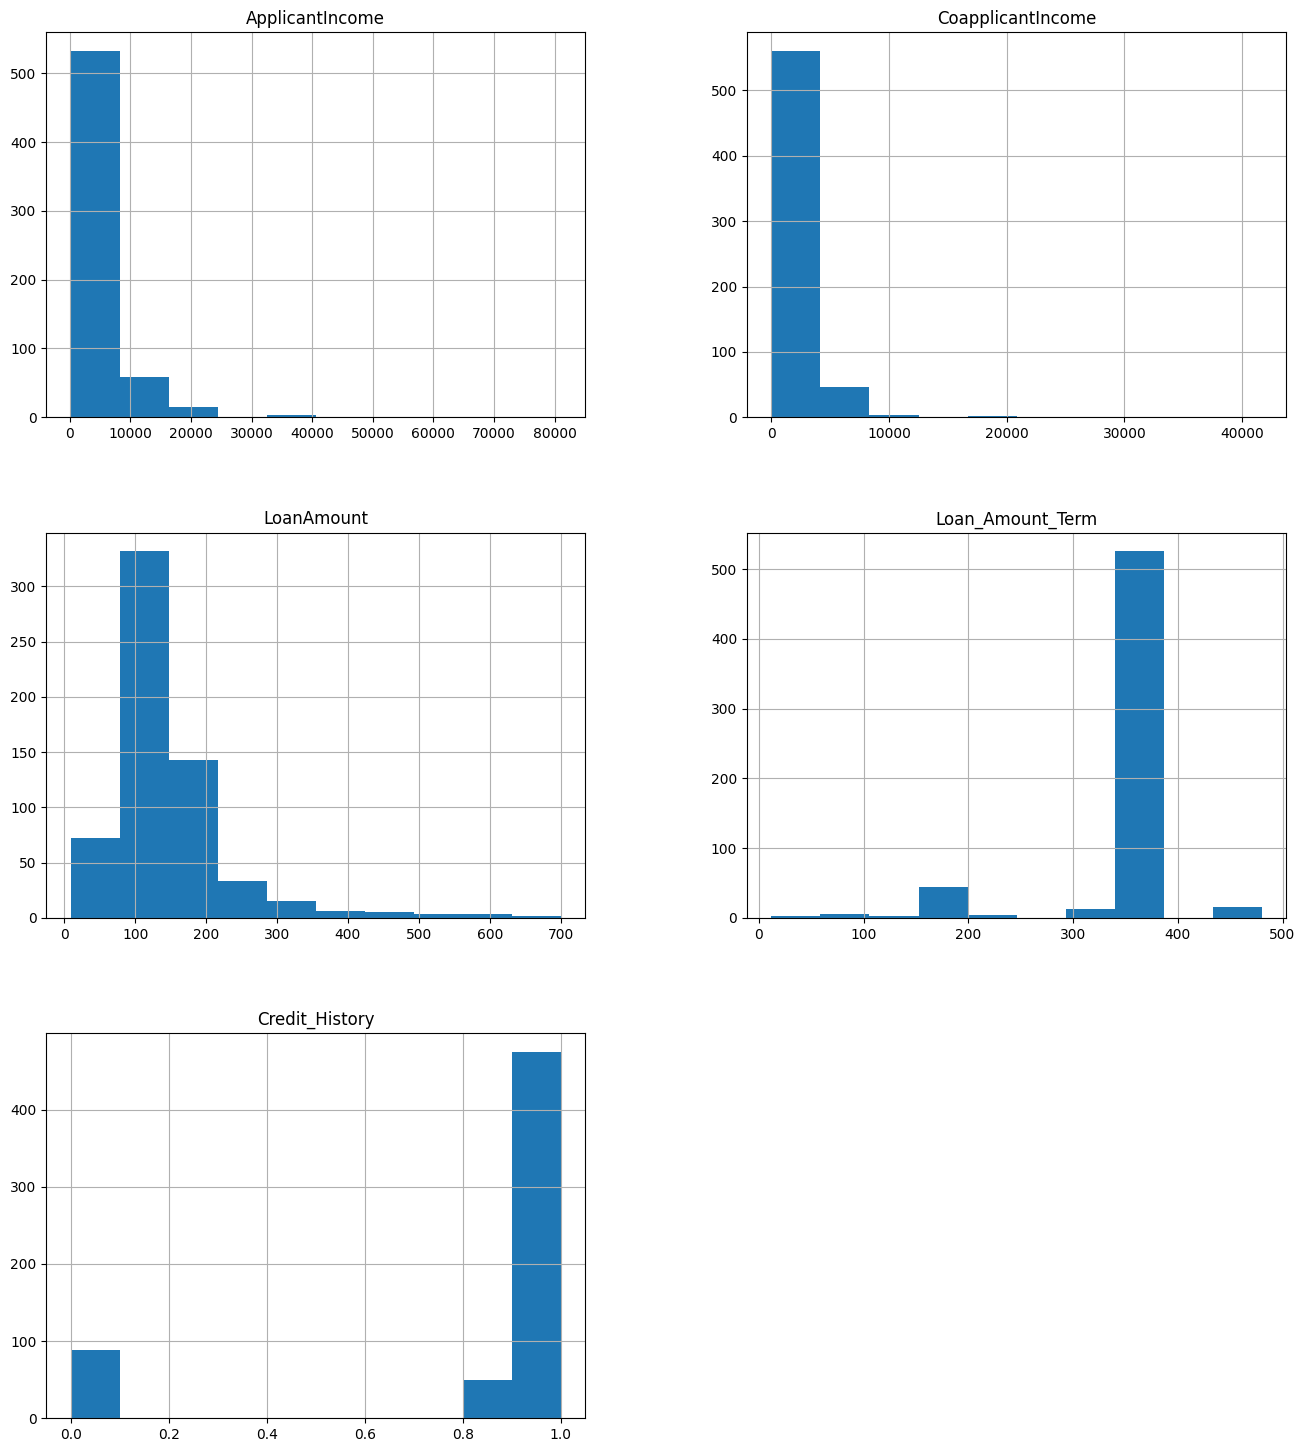

In [88]:
train.hist(figsize=(16,18))

In [89]:
train['Loan_Amount_Term'] = np.log(train.Loan_Amount_Term)

<Axes: >

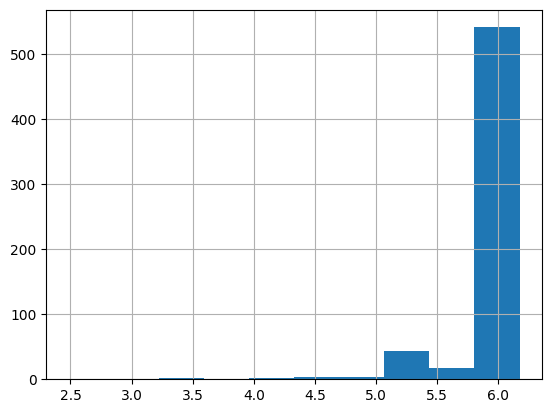

In [90]:
train['Loan_Amount_Term'].hist()

In [91]:
X = train.drop(['Loan_Status','Loan_ID'],axis=1)
y = train.Loan_Status

One-Hot Encoding

In [92]:
X = pd.get_dummies(X)

In [93]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2024)

In [94]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [95]:
#Decision Tree
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [96]:
#RandomForest
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [97]:
#SVM
svc_model = SVC()
svc_model.fit(X_train,y_train)

SVC()

In [98]:
#Naive Bayes
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [99]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [100]:
y_pred_lr = lr.predict(X_test)
y_pred_dt = dtc.predict(X_test)
y_pred_rf = rfc.predict(X_test)
y_pred_sv = svc_model.predict(X_test)
y_pred_nb = nb.predict(X_test)


In [101]:
print('Accuracy Score')
print('Logistic Regression',accuracy_score(y_test,y_pred_lr))
print('Decision Tree',accuracy_score(y_test,y_pred_dt))
print('Random Forest',accuracy_score(y_test,y_pred_rf))
print('SVM',accuracy_score(y_test,y_pred_sv))
print('Naive Bayes',accuracy_score(y_test,y_pred_nb))


Accuracy Score
Logistic Regression 0.8617886178861789
Decision Tree 0.6829268292682927
Random Forest 0.8211382113821138
SVM 0.7317073170731707
Naive Bayes 0.8455284552845529
